In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [371]:
df = pd.read_csv(r"C:\Users\Suman Kumar\Dropbox\PC\Downloads\ML Assignments\hyundi.csv")
df

,model,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,I20,2017,Manual,17307,Petrol,145,58.9,1.2,7999
1,Tucson,2016,Automatic,25233,Diesel,235,43.5,2.0,14499
2,Tucson,2016,Manual,37877,Diesel,30,61.7,1.7,11399
3,I10,2016,Manual,23789,Petrol,20,60.1,1.0,6499
4,IX35,2015,Manual,33177,Diesel,160,51.4,2.0,10199
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,Manual,25906,Diesel,0,78.4,1.6,8680
4856,I40,2015,Manual,59508,Diesel,30,65.7,1.7,7830
4857,I10,2017,Manual,13810,Petrol,20,60.1,1.0,6830
4858,Tucson,2018,Manual,23313,Petrol,145,44.8,1.6,13994


# Check dataset size

In [372]:
df.shape

(4860, 9)

# Find and treat missing values (If any)

In [373]:
df.isna().sum()

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
price           0
dtype: int64

# Check column types and describe which columns are numerical or categorical

In [374]:
df.dtypes

model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [375]:
df[['year','price']].agg(['sum','min'])

,year,price
sum,9803143,61965637
min,2000,1200


# Perform Univariate analysis
Calculate mean, median, std dev, and quartiles of numerical data


In [376]:
df.describe()

,year,mileage,tax(£),mpg,engineSize,price
count,4860.000000,4860.000000,4860.000000,4860.000000,4860.000000,4860.00000
mean,2017.107613,21486.049588,121.147119,53.827798,1.457922,12750.13107
std,1.920456,17710.196964,58.003289,12.736042,0.400788,5992.92231
min,2000.000000,1.000000,0.000000,1.100000,0.000000,1200.00000
25%,2016.000000,8339.250000,125.000000,44.800000,1.200000,8000.00000
50%,2017.000000,17462.000000,145.000000,55.400000,1.600000,11990.00000
75%,2019.000000,30967.000000,145.000000,60.100000,1.700000,15733.75000
max,2020.000000,138000.000000,555.000000,256.800000,2.900000,92000.00000


# Plot histogram for a few categorical variables

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

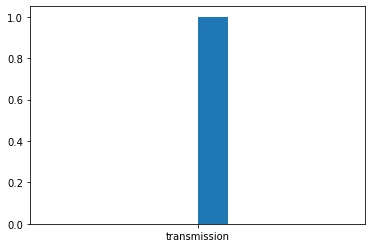

In [377]:
plt.hist('transmission')

# Check the distribution of numerical variables and comment on it

# Perform Bivariate analysis
Plot pair plots

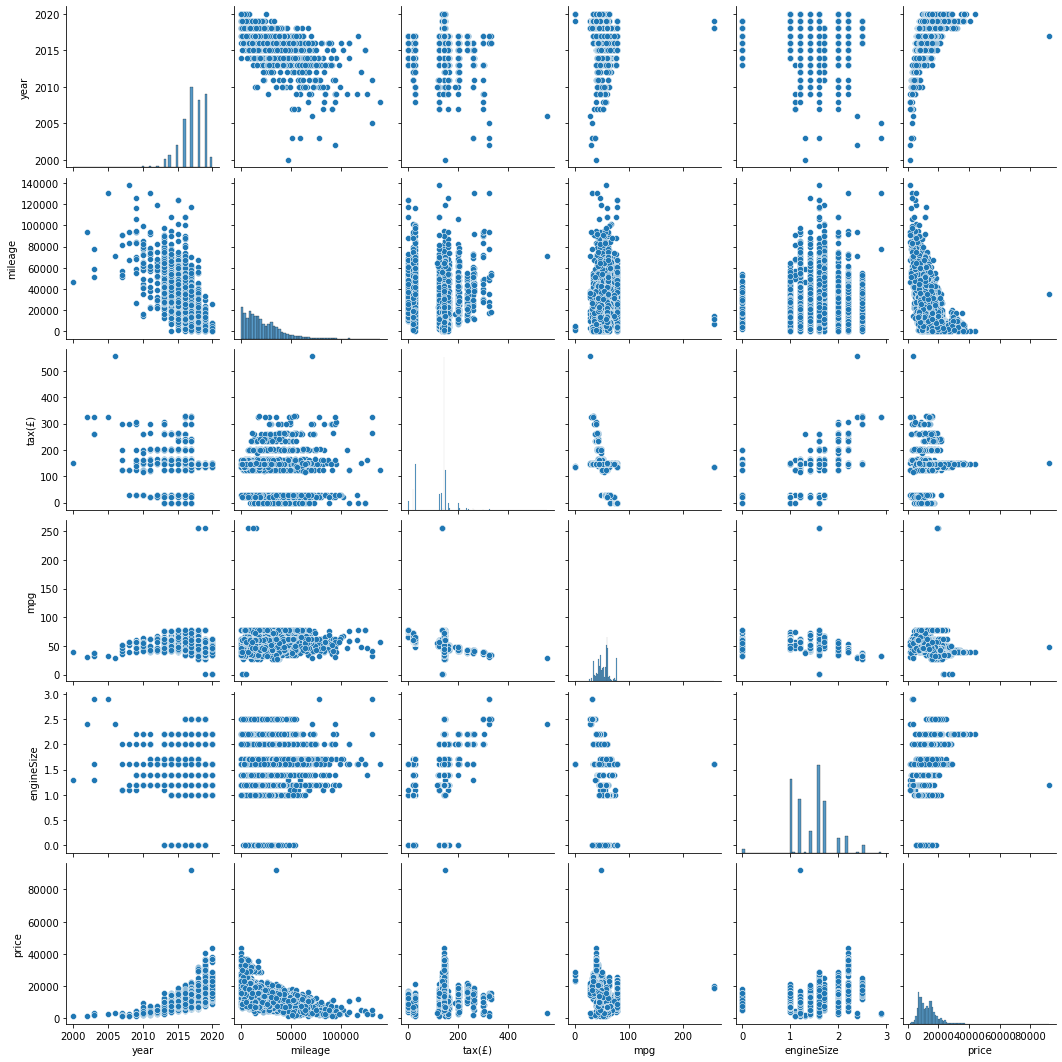

In [378]:
sns.pairplot(df)

# Outlier removing

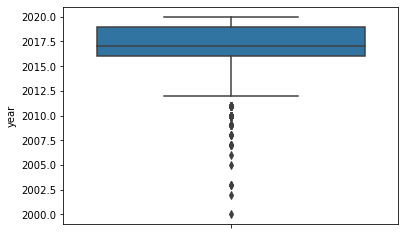

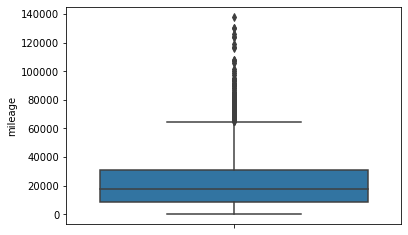

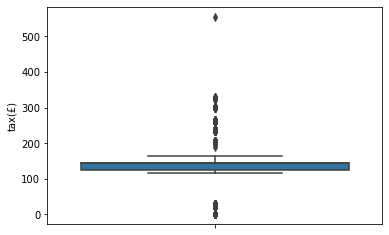

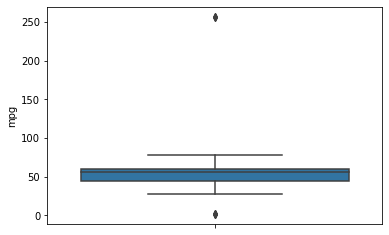

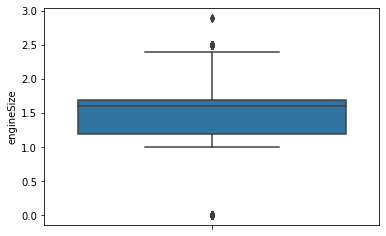

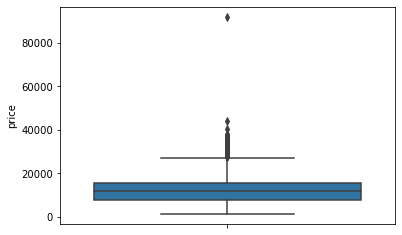

In [379]:
for i in df.columns:
    if df[i].dtypes == object:
        continue
    plt.figure()
    sns.boxplot(y = df[i])

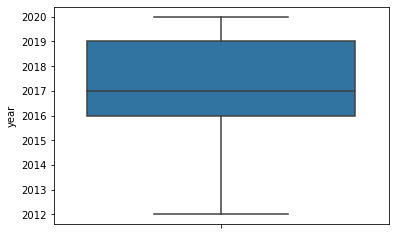

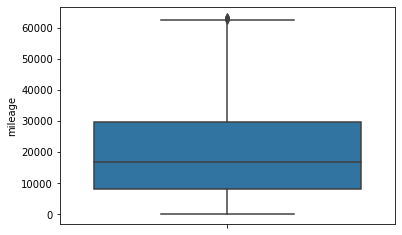

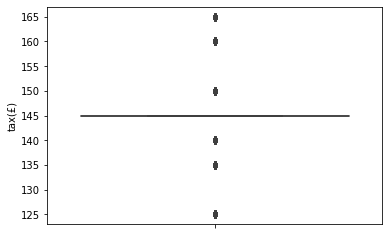

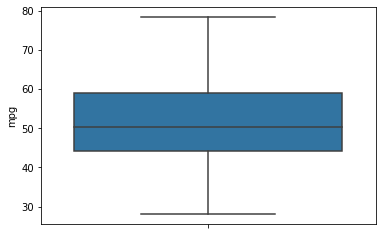

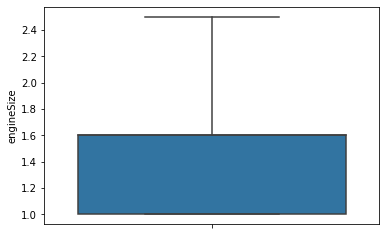

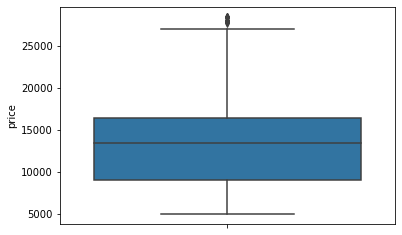

In [380]:
for i in df.columns:
    if df[i].dtypes == object:
        continue
    
    p25=df[i].quantile(0.25)
    p75=df[i].quantile(0.75)
    iqr=p75-p25
    low=p25-(1.5*iqr)
    up=p75+(1.5*iqr)
    df=df[(df[i]>=low) & (df[i]<=up)]
    plt.figure()
    sns.boxplot(y = df[i])

In [381]:
df

,model,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,I20,2017,Manual,17307,Petrol,145,58.9,1.2,7999
4,IX35,2015,Manual,33177,Diesel,160,51.4,2.0,10199
7,Tucson,2016,Automatic,30300,Diesel,125,57.6,1.7,14199
8,I30,2018,Automatic,38082,Petrol,145,51.4,1.4,10399
10,Tucson,2017,Manual,22888,Diesel,150,61.7,1.7,13200
...,...,...,...,...,...,...,...,...,...
4850,I10,2018,Manual,17879,Petrol,145,60.1,1.0,7200
4851,I10,2018,Manual,8851,Petrol,145,60.1,1.0,7995
4852,I10,2018,Manual,14788,Petrol,150,60.1,1.0,7200
4858,Tucson,2018,Manual,23313,Petrol,145,44.8,1.6,13994


# Perform a Chi-square analysis to check whether there is a relationship between
### transmission and fuelType
### fuelType and model


In [382]:
df[['transmission','fuelType']].corr()

""


In [383]:
df[['model','fuelType']].corr()

""


# Calculate Pearson correlation, and plot their heatmap

In [384]:
y = df.corr()
y

,year,mileage,tax(£),mpg,engineSize,price
year,1.000000,-0.664617,0.041682,-0.170079,-0.105702,0.520085
mileage,-0.664617,1.000000,-0.042866,0.155450,0.243540,-0.387616
tax(£),0.041682,-0.042866,1.000000,-0.335676,-0.121233,-0.130215
mpg,-0.170079,0.155450,-0.335676,1.000000,-0.217437,-0.263621
engineSize,-0.105702,0.243540,-0.121233,-0.217437,1.000000,0.536219
price,0.520085,-0.387616,-0.130215,-0.263621,0.536219,1.000000


<AxesSubplot:>

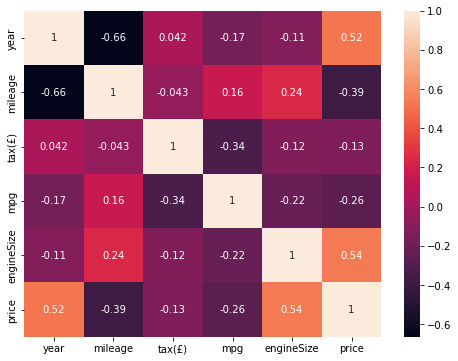

In [385]:
plt.figure(figsize = (8,6))
sns.heatmap(y, annot = True)

In [386]:
df.head(4)

,model,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,I20,2017,Manual,17307,Petrol,145,58.9,1.2,7999
4,IX35,2015,Manual,33177,Diesel,160,51.4,2.0,10199
7,Tucson,2016,Automatic,30300,Diesel,125,57.6,1.7,14199
8,I30,2018,Automatic,38082,Petrol,145,51.4,1.4,10399


# Drop any unnecessary columns

In [387]:
df.drop('model',axis = 1,inplace = True)

In [388]:
df

,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,2017,Manual,17307,Petrol,145,58.9,1.2,7999
4,2015,Manual,33177,Diesel,160,51.4,2.0,10199
7,2016,Automatic,30300,Diesel,125,57.6,1.7,14199
8,2018,Automatic,38082,Petrol,145,51.4,1.4,10399
10,2017,Manual,22888,Diesel,150,61.7,1.7,13200
...,...,...,...,...,...,...,...,...
4850,2018,Manual,17879,Petrol,145,60.1,1.0,7200
4851,2018,Manual,8851,Petrol,145,60.1,1.0,7995
4852,2018,Manual,14788,Petrol,150,60.1,1.0,7200
4858,2018,Manual,23313,Petrol,145,44.8,1.6,13994


In [389]:
for i in df.columns:
    if df[i].dtypes == object:
        print(df[i].unique() ,'\n\n')

['Manual' 'Automatic' 'Semi-Auto' 'Other'] 


['Petrol' 'Diesel' 'Hybrid' 'Other'] 




# Split into train and test set

In [390]:
from sklearn.preprocessing import LabelEncoder

In [391]:
le = LabelEncoder()

In [392]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = le.fit_transform(df[i])

In [393]:
df

,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,2017,1,17307,3,145,58.9,1.2,7999
4,2015,1,33177,0,160,51.4,2.0,10199
7,2016,0,30300,0,125,57.6,1.7,14199
8,2018,0,38082,3,145,51.4,1.4,10399
10,2017,1,22888,0,150,61.7,1.7,13200
...,...,...,...,...,...,...,...,...
4850,2018,1,17879,3,145,60.1,1.0,7200
4851,2018,1,8851,3,145,60.1,1.0,7995
4852,2018,1,14788,3,150,60.1,1.0,7200
4858,2018,1,23313,3,145,44.8,1.6,13994


In [394]:
x = df.iloc[:,:-1].values

In [395]:
y = df.iloc[:,-1].values

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2)

In [398]:
# from sklearn.preprocessing import StandardScaler

In [399]:
# sc = StandardScaler()

In [400]:
# x_train = sc.fit_transform(x_train)

In [401]:
# x_test = sc.fit_transform(x_test)

# Making Model Using Linear regression

In [402]:
# from sklearn.linear_model import LinearRegression

In [403]:
# reg = LinearRegression()

In [404]:
# reg.fit(x_train,y_train)

In [405]:
# reg.intercept_

In [406]:
# reg.coef_

In [407]:
# y_pred = reg.predict(x_test)

In [408]:
# from sklearn.metrics import mean_squared_error

In [409]:
# mean_squared_error(y_test,y_pred)

In [410]:
# from sklearn.metrics import r2_score

In [411]:
# LRM = r2_score(y_test,y_pred)
LRM

0.6824680959088425

# Decision Tree 

In [430]:
x = df.drop('price',axis = 1).values
x

array([[2.0170e+03, 1.0000e+00, 1.7307e+04, ..., 1.4500e+02, 5.8900e+01,
        1.2000e+00],
       [2.0150e+03, 1.0000e+00, 3.3177e+04, ..., 1.6000e+02, 5.1400e+01,
        2.0000e+00],
       [2.0160e+03, 0.0000e+00, 3.0300e+04, ..., 1.2500e+02, 5.7600e+01,
        1.7000e+00],
       ...,
       [2.0180e+03, 1.0000e+00, 1.4788e+04, ..., 1.5000e+02, 6.0100e+01,
        1.0000e+00],
       [2.0180e+03, 1.0000e+00, 2.3313e+04, ..., 1.4500e+02, 4.4800e+01,
        1.6000e+00],
       [2.0160e+03, 0.0000e+00, 1.1472e+04, ..., 1.2500e+02, 5.7600e+01,
        1.7000e+00]])

In [431]:
y = df['price'].values
y

array([ 7999, 10199, 14199, ...,  7200, 13994, 15999], dtype=int64)

In [432]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [433]:
from sklearn.tree import DecisionTreeClassifier

In [434]:
dc = DecisionTreeClassifier()

In [435]:
dc.fit(x_train , y_train)

DecisionTreeClassifier()

In [436]:
y_pred = dc.predict(x_test)

In [437]:
df.head(2)

,year,transmission,mileage,fuelType,tax(£),mpg,engineSize,price
0,2017,1,17307,3,145,58.9,1.2,7999
4,2015,1,33177,0,160,51.4,2.0,10199


In [438]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [439]:
from sklearn.metrics import accuracy_score

In [440]:
accuracy_score(y_test,y_pred)

0.0578386605783866

# Random Forest

In [441]:
x = df.drop('price',axis = 1).values
x

array([[2.0170e+03, 1.0000e+00, 1.7307e+04, ..., 1.4500e+02, 5.8900e+01,
        1.2000e+00],
       [2.0150e+03, 1.0000e+00, 3.3177e+04, ..., 1.6000e+02, 5.1400e+01,
        2.0000e+00],
       [2.0160e+03, 0.0000e+00, 3.0300e+04, ..., 1.2500e+02, 5.7600e+01,
        1.7000e+00],
       ...,
       [2.0180e+03, 1.0000e+00, 1.4788e+04, ..., 1.5000e+02, 6.0100e+01,
        1.0000e+00],
       [2.0180e+03, 1.0000e+00, 2.3313e+04, ..., 1.4500e+02, 4.4800e+01,
        1.6000e+00],
       [2.0160e+03, 0.0000e+00, 1.1472e+04, ..., 1.2500e+02, 5.7600e+01,
        1.7000e+00]])

In [442]:
y = df['price'].values
y

array([ 7999, 10199, 14199, ...,  7200, 13994, 15999], dtype=int64)

In [443]:
x_train

array([[2.0180e+03, 1.0000e+00, 4.9090e+03, ..., 1.5000e+02, 5.0400e+01,
        1.4000e+00],
       [2.0180e+03, 1.0000e+00, 1.9000e+01, ..., 1.4500e+02, 4.4100e+01,
        1.0000e+00],
       [2.0180e+03, 3.0000e+00, 2.8851e+04, ..., 1.5000e+02, 5.1400e+01,
        1.4000e+00],
       ...,
       [2.0170e+03, 1.0000e+00, 1.7475e+04, ..., 1.4500e+02, 6.1700e+01,
        1.7000e+00],
       [2.0190e+03, 0.0000e+00, 5.5000e+03, ..., 1.3500e+02, 7.8500e+01,
        1.6000e+00],
       [2.0150e+03, 1.0000e+00, 2.9660e+04, ..., 1.6000e+02, 4.4800e+01,
        1.6000e+00]])

In [444]:
y_train 

array([10250, 17495, 12790, ..., 13991, 23991, 10795], dtype=int64)

In [445]:
y_train

array([10250, 17495, 12790, ..., 13991, 23991, 10795], dtype=int64)

In [446]:
y_test

array([19500, 13871, 15995,  8495, 14250, 10295, 18195,  8990,  5992,
       10080, 13995, 22000, 22720, 14470, 20998, 15499, 17990, 11498,
       15995, 10995,  7495, 17680, 13850, 23995, 15995,  8990, 16995,
        8495, 19995, 15992, 16990,  7998, 12750, 18843,  9690, 18395,
       10995, 13985,  6800, 15498, 10998,  8493, 13490,  7495, 13790,
        7484,  8291,  7433,  9460, 12498, 10349, 21985, 25980, 10250,
       12249, 20990, 20495, 13499,  6985,  8690, 16000, 11240,  9299,
        9490, 13995,  7298, 10995, 11200,  7998, 15498,  8995, 18981,
       12769,  7100, 23991, 22990, 12470, 12000, 21795, 17490, 19489,
       13995, 15000,  6950,  8991, 14750,  5989, 16295,  6240, 11741,
       10987, 17750, 23500, 15700,  8189, 13969,  7499, 14430, 14995,
       14495, 13591, 13960,  6998, 17998, 20991,  9491,  8000,  7490,
        6798,  5790,  7750, 22480,  6995, 26000, 14747, 15040, 13999,
       18695,  7995, 21000, 14998, 19981, 15000, 12995, 10120, 14500,
       12400,  9494,

Hyperparameter training

In [447]:
no_of_decision_trees = [10,20,30,40,50,60,70,80]
max_no_of_features = ['sqrt','log2',90,100]
max_depth_of_decision_tree = [6,7,8,9,10,11,12,13,14,15]
criterion_for_decision_trees = ['gini','empathy']
min_sample_split = [1,2,3,4,5]

In [448]:
random_grid={
    'n_estimators': no_of_decision_trees,
    'max_features': max_no_of_features,
    'max_depth': max_depth_of_decision_tree,
    'criterion': criterion_for_decision_trees,
    'min_samples_split': min_sample_split
}

In [449]:
type(random_grid)

dict

In [450]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [451]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=25, cv=5, n_jobs=-1)

In [452]:
rscv.fit(x_train,y_train)

C:\Users\Suman Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Suman Kumar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.07768459        nan        nan 0.07235633
        nan        nan        nan        nan        nan        nan
        nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'empathy'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2', 90,
                                                         100],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80]})

In [453]:
rscv.best_params_

{'n_estimators': 60,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

In [454]:
rf_final=RandomForestClassifier(n_estimators=100,min_samples_split=5,max_features="sqrt", max_depth=7,criterion="entropy")

In [455]:
rf_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_split=5)

In [456]:
Y_pred=rf_final.predict(x_test)

In [457]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.0578386605783866

# Use grid search CV to tune the hyperparameter of the best model

In [458]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [459]:

# create some data
X, y = make_classification(n_samples=1000)

In [460]:
# define the model to optimize
model = DecisionTreeClassifier()

In [461]:
# define the hyperparameter space to search over
param_grid = {'max_depth': range(1, 11)}

In [462]:
# define the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

In [463]:
# fit the grid search object
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11)})

In [464]:
# extract the best hyperparameters
best_params = grid_search.best_params_

In [465]:
# refit the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2)

# Train a polynomial regression model with degrees 2, and 3 and compare its performance with other models 

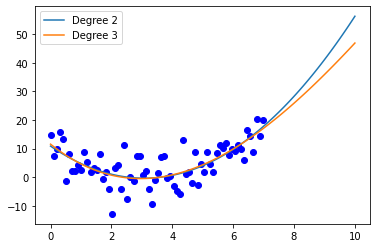

In [466]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = x**2 - 5*x + 6 + np.random.randn(100)*5

# Split the data into training and testing sets
split = int(0.7*len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

# Create polynomial features with degree 2 and 3
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)

x_train_poly2 = poly2.fit_transform(x_train.reshape(-1, 1))
x_train_poly3 = poly3.fit_transform(x_train.reshape(-1, 1))

# Train the polynomial regression models
poly_reg2 = LinearRegression()
poly_reg3 = LinearRegression()

poly_reg2.fit(x_train_poly2, y_train)
poly_reg3.fit(x_train_poly3, y_train)

# Plot the results
plt.scatter(x_train, y_train, color='blue')
plt.plot(x, poly_reg2.predict(poly2.transform(x.reshape(-1, 1))), label='Degree 2')
plt.plot(x, poly_reg3.predict(poly3.transform(x.reshape(-1, 1))), label='Degree 3')
plt.legend()
plt.show()